Dataset Head:


,city,date,rate
0,Ahmedabad,2019-04-22,70.32
1,Ahmedabad,2019-04-22,70.32
2,Ahmedabad,2019-04-22,70.32
3,Ahmedabad,2019-04-22,70.32
4,Ahmedabad,2019-04-22,70.32



Columns in dataset: ['city', 'date', 'rate']

Processed Data:


,price,target
0,70.32,70.32
68,70.32,70.32
67,70.32,70.32
66,70.32,70.32
65,70.32,70.32



Model Performance:
MSE: 0.6865527132016498
R² Score: 0.9084226613769721


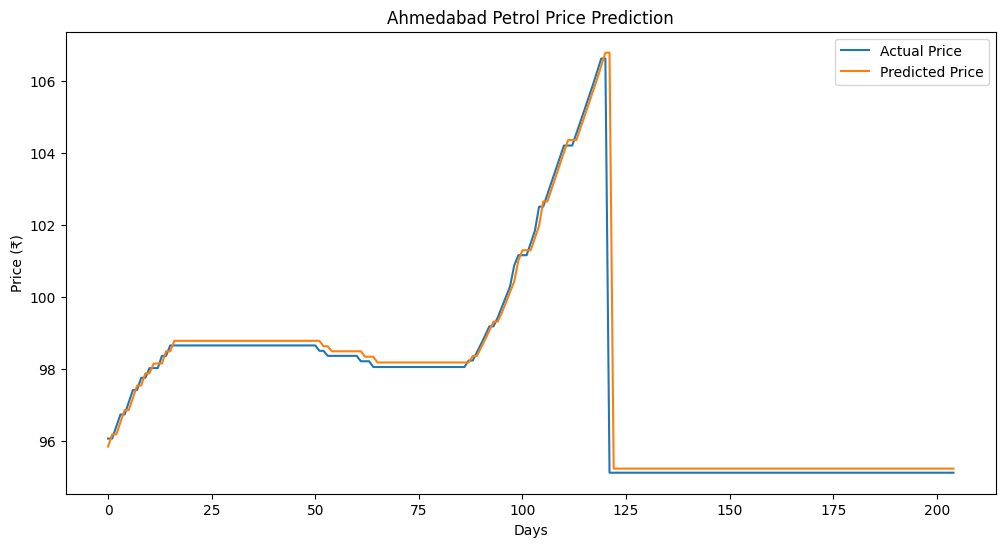


Predicted next day petrol price in Ahmedabad: ₹95.22


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [4]:
# =========================================
# Petrol Price Prediction - Ahmedabad
# =========================================

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# =========================================
# 1. Load Data
# =========================================
file_path = r"D:\DS Projects\Petrol price prediction\Petrol price.csv"
df = pd.read_csv(file_path)

print("Dataset Head:")
display(df.head())

print("\nColumns in dataset:", df.columns.tolist())

# =========================================
# 2. Data Preprocessing
# =========================================
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Rename columns to standard format
df = df.rename(columns={"rate": "price"})

# Convert date column
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Build dataset for prediction
data = df[['price']].copy()
data['target'] = data['price'].shift(-1)
data = data.dropna()

print("\nProcessed Data:")
display(data.head())

# =========================================
# 3. Train-Test Split
# =========================================
X = data[['price']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# =========================================
# 4. Train Model
# =========================================
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# =========================================
# 5. Evaluation
# =========================================
print("\nModel Performance:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Price")
plt.plot(y_pred, label="Predicted Price")
plt.legend()
plt.title("Ahmedabad Petrol Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price (₹)")
plt.show()

# =========================================
# 6. Predict Next Day Petrol Price
# =========================================
latest_price = data['price'].iloc[-1]
future_price = model.predict(np.array(latest_price).reshape(-1, 1))

print(f"\nPredicted next day petrol price in Ahmedabad: ₹{future_price[0]:.2f}")
